# Preprocesamiento listings_details:

### Librerias:

In [23]:
import numpy as np
import pandas as pd
from collections import defaultdict
from sklearn.preprocessing import MinMaxScaler
from scipy import stats
import re
import seaborn as sns

### Importación archivos/creación dataframe:

In [24]:
listings_details = pd.read_csv("data/listings_details.csv.gz",  compression='gzip',index_col= "id", low_memory=False)

In [25]:
df = listings_details.copy()

### Estado inicial prelimpieza:

#### Qué tenemos:

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 42451 entries, 777451666060243581 to 625415450215801684
Data columns (total 74 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   listing_url                                   42451 non-null  object 
 1   scrape_id                                     42451 non-null  int64  
 2   last_scraped                                  42451 non-null  object 
 3   source                                        42451 non-null  object 
 4   name                                          42449 non-null  object 
 5   description                                   41701 non-null  object 
 6   neighborhood_overview                         24957 non-null  object 
 7   picture_url                                   42451 non-null  object 
 8   host_id                                       42451 non-null  int64  
 9   host_url                            

Vamos a ver si las variables numericas nos las sabe identificar y calcular. Vemos que algunas de ellas como los id no deberian de ser numeros sino categoricas:

In [27]:
listings_details.describe()

,scrape_id,host_id,host_listings_count,host_total_listings_count,latitude,longitude,accommodates,bathrooms,bedrooms,beds,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
count,4.245100e+04,4.245100e+04,42449.000000,42449.000000,42451.000000,42451.000000,42451.000000,0.0,38832.000000,41854.000000,...,30533.000000,30526.000000,30532.000000,30524.000000,30522.000000,42451.000000,42451.000000,42451.000000,42451.000000,30780.000000
mean,2.023031e+13,1.634216e+08,142.159085,169.611251,34.058002,-118.319520,3.908224,NaN,1.775366,2.160486,...,4.710862,4.839167,4.829212,4.788386,4.673745,56.508092,20.247650,36.067914,0.161480,1.442880
std,0.000000e+00,1.593238e+08,653.655431,760.320411,0.136723,0.171488,2.731220,NaN,1.182934,1.595014,...,0.495622,0.414862,0.435060,0.405893,0.498480,191.566139,93.453999,171.220843,1.787155,1.801396
min,2.023031e+13,5.210000e+02,0.000000,0.000000,33.338480,-118.934830,0.000000,NaN,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.010000
25%,2.023031e+13,2.430378e+07,1.000000,2.000000,34.000925,-118.432010,2.000000,NaN,1.000000,1.000000,...,4.650000,4.860000,4.840000,4.750000,4.600000,1.000000,1.000000,0.000000,0.000000,0.230000
50%,2.023031e+13,1.074344e+08,3.000000,5.000000,34.064243,-118.347517,3.000000,NaN,1.000000,2.000000,...,4.870000,4.970000,4.970000,4.910000,4.800000,2.000000,1.000000,0.000000,0.000000,0.770000
75%,2.023031e+13,2.735477e+08,15.000000,24.000000,34.118700,-118.247860,5.000000,NaN,2.000000,3.000000,...,5.000000,5.000000,5.000000,5.000000,4.970000,11.000000,5.000000,1.000000,0.000000,2.130000
max,2.023031e+13,5.039739e+08,4784.000000,8316.000000,34.811130,-117.653400,16.000000,NaN,24.000000,50.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,1003.000000,717.000000,1001.000000,37.000000,81.190000


Cantidad observaciones o instancias hay en el conjunto de datos, es decir, número de filas o registros en el DataFrame (data points) y características en el DataFrame antes de realizar cualquier limpieza o manipulación adicional:

In [28]:
print("Antes de limpiar los datos hay: " + str(df.count()[0]) + " observaciones o data points.")
print("Antes de limpiar los datos hay: " + str(len(df.columns)) + " columnas.")

Antes de limpiar los datos hay: 42451 observaciones o data points.
Antes de limpiar los datos hay: 74 columnas.


#### Nulos:

In [29]:
# Nulos por columna (observamos las 30 primeras columnas porque hay 74 en total)
df.isnull().sum().sort_values(ascending=False)[0:30]

bathrooms                      42451
calendar_updated               42451
license                        30509
host_about                     17825
neighborhood_overview          17494
neighbourhood                  17493
review_scores_value            11929
review_scores_location         11927
review_scores_checkin          11925
review_scores_accuracy         11920
review_scores_communication    11919
review_scores_cleanliness      11918
last_review                    11671
first_review                   11671
reviews_per_month              11671
review_scores_rating           11671
host_response_rate              9375
host_response_time              9375
host_neighbourhood              8747
host_location                   8462
host_acceptance_rate            8343
bedrooms                        3619
description                      750
beds                             597
host_is_superhost                159
bathrooms_text                    41
maximum_nights_avg_ntm             5
m

In [30]:
nulos_values = df.isnull().sum()
nulos_values_percentage = nulos_values/len(df)*100 #Calculamos el % del los datos faltantes en cada columna
nulos_values_totales= nulos_values_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
nulos_values_totales = pd.DataFrame(nulos_values_totales,columns=["% nulos"])
nulos_values_totales.sort_values(by="% nulos", ascending=False).head(21).T

,bathrooms,calendar_updated,license,host_about,neighborhood_overview,neighbourhood,review_scores_value,review_scores_location,review_scores_checkin,review_scores_accuracy,...,review_scores_cleanliness,last_review,first_review,reviews_per_month,review_scores_rating,host_response_rate,host_response_time,host_neighbourhood,host_location,host_acceptance_rate
% nulos,100.0,100.0,71.868743,41.989588,41.209865,41.20751,28.100634,28.095922,28.091211,28.079433,...,28.074721,27.492874,27.492874,27.492874,27.492874,22.084285,22.084285,20.604933,19.93357,19.653247


Hay columnas con el 100% de los valores nulos. Con al menos un 20% aproximadamente hay 21 columnas.  
Vamos a eliminar esas columnas primero.

<Axes: ylabel='id'>

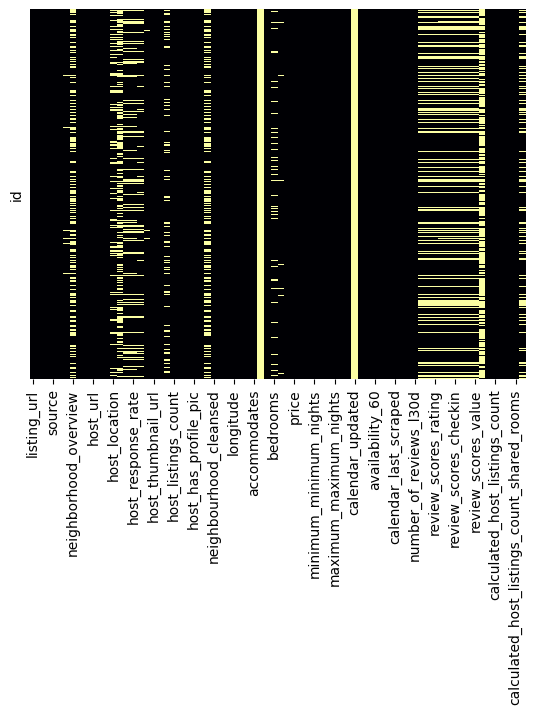

In [31]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='inferno')

In [32]:
umbral = 18  # Porcentaje límite de valores nulos

'''Obtener la lista de columnas a eliminar.
Utilizamos .index.tolist() para obtener una lista de los nombres de las columnas a eliminar.'''
columnas_eliminar = nulos_values_totales[nulos_values_totales['% nulos'] > umbral].index.tolist()

# Eliminar las columnas del DataFrame original
df1 = df.drop(columnas_eliminar, axis=1)

<Axes: ylabel='id'>

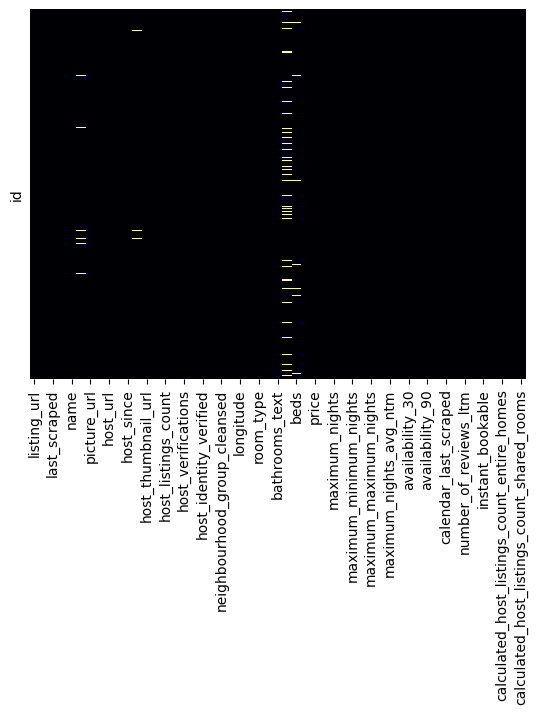

In [33]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='inferno')

In [34]:
# Para que no me oculte columnas en medio '(...)' del dataframe:
pd.set_option('display.max_columns', None)

In [35]:
nulos_values = df1.isnull().sum()
nulos_values_percentage = nulos_values/len(df1)*100 #Calculamos el % del los datos faltantes en cada columna
nulos_values_totales= nulos_values_percentage.sort_values(ascending = False) #Ordenamos de mayor a menor
nulos_values_totales = pd.DataFrame(nulos_values_totales,columns=["% nulos"])
nulos_values_totales[nulos_values_totales['% nulos'] > 0].sort_values(by="% nulos", ascending=False).T

,bedrooms,description,beds,host_is_superhost,bathrooms_text,maximum_nights_avg_ntm,maximum_minimum_nights,minimum_minimum_nights,minimum_nights_avg_ntm,maximum_maximum_nights,minimum_maximum_nights,host_since,host_name,name,host_thumbnail_url,host_identity_verified,host_has_profile_pic,host_verifications,host_picture_url,host_listings_count,host_total_listings_count
% nulos,8.525123,1.766743,1.406327,0.374549,0.096582,0.011778,0.011778,0.011778,0.011778,0.011778,0.011778,0.004711,0.004711,0.004711,0.004711,0.004711,0.004711,0.004711,0.004711,0.004711,0.004711


In [36]:
df1[['host_listings_count', 'host_total_listings_count']]

,host_listings_count,host_total_listings_count
id,,
777451666060243581,1.0,1.0
698097753730921190,4.0,5.0
13063118,15.0,22.0
39337076,4.0,6.0
13077628,1.0,6.0
...,...,...
17286704,3.0,3.0
751077061221390362,5.0,5.0
663030240787490751,5.0,7.0


Analizamos de las columnas restantes con cuales nos quedamos y que hacemos con sus valores nulos:

In [37]:
# Elimino las columnas con valores nulos que no quiero para nada:
df1 = df1.drop(columns=['bedrooms', 'description', 'beds','bathrooms_text','maximum_nights_avg_ntm', 'minimum_nights_avg_ntm', 'maximum_maximum_nights','minimum_maximum_nights','host_since','host_thumbnail_url','host_identity_verified','host_has_profile_pic','host_verifications','host_picture_url','host_listings_count','host_total_listings_count'] , axis=1)

Me parece interesante saber si es superhost

'host_is_superhost'

Me parece interesante saber si el minimo de noches para los que tienen mas de un alojamiento es de 30 dias sino incumplen con la ley porque solo pueden ofrecer estancias cortas los anfitriones que ofrecen su primera residencia. Si ofrecen su segunda o cualquier otra residencia minimo tienen que ofrecer 30 dias.
'maximum_minimum_nights' ,'minimum_minimum_nights','host_name','name',

In [38]:
# Se rellenan los valores nulos de las variables que si que nos interesan en principio utilizar:

# Para rellenar variables string/objeto con '?'
string_columns = df1.select_dtypes(include=['object']).columns.tolist()
numerical_columns = df1.select_dtypes(include=['int', 'float']).columns.tolist()
df1[string_columns] = df1[string_columns].fillna('?')

# Para rellenar variables numéricas con 0
df1[numerical_columns] = df1[numerical_columns].fillna(0)

<Axes: ylabel='id'>

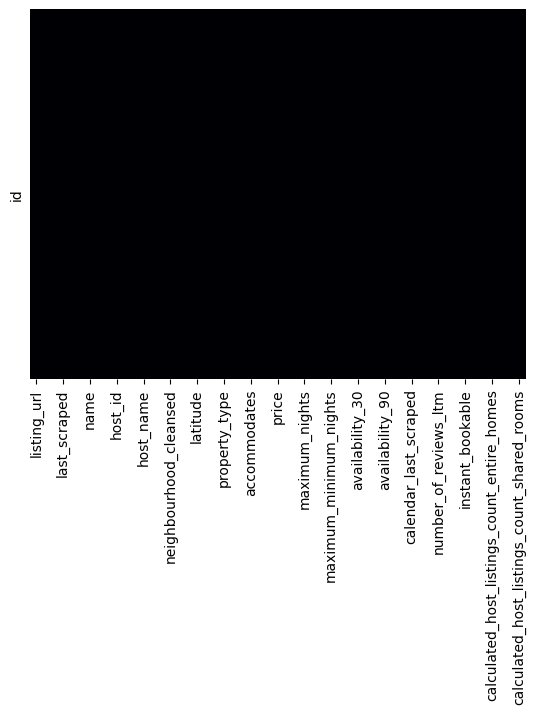

In [39]:
sns.heatmap(df1.isnull(),yticklabels=False,cbar=False,cmap='inferno')

Perfecto! ya no hay valores nulos!!!

#### Duplicados:

In [40]:
df1.duplicated().sum()

0

#### Eliminación variables inútiles:

En una excel he compiado todas las variables del database con la información relacionada y una vez revisadas he hecho una selección de ellas, por lo tanto, eliminaremos a continuación las que no me parecen interesantes para analizar: 

In [41]:
df1.columns

Index(['listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'picture_url', 'host_id', 'host_url', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'amenities',
       'price', 'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped', 'number_of_reviews', 'number_of_reviews_ltm',
       'number_of_reviews_l30d', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

Elimino las columnas que no quiero analizar:

In [42]:
df1 = df1.drop(columns=['listing_url', 'scrape_id', 'last_scraped', 'source','picture_url','host_url','amenities','maximum_nights', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'calendar_last_scraped','number_of_reviews_ltm',
       'number_of_reviews_l30d'])

In [43]:
df1.columns

Index(['name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'price',
       'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

#### Tipo de datos de las variables:

Vamos a ver el tipo de dato que presentan las variables:

In [44]:
df1.dtypes

name                                             object
host_id                                           int64
host_name                                        object
host_is_superhost                                object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
price                                            object
minimum_nights                                    int64
minimum_minimum_nights                          float64
maximum_minimum_nights                          float64
number_of_reviews                                 int64
instant_bookable                                 object
calculated_host_listings_count                  

Host_id vamos a cambiarlo por string:

In [45]:
df1['host_id']=df1['host_id'].astype(str)

Vemos que price deberia ser una cifra, vamos a ver que aspecto tiene y como podemos limpiarlo:

In [46]:
df1['price']

id
777451666060243581      $399.00
698097753730921190       $46.00
13063118                $408.00
39337076                 $80.00
13077628              $2,138.00
                        ...    
17286704                 $40.00
751077061221390362       $48.00
663030240787490751       $46.00
15876540                 $68.00
625415450215801684       $48.00
Name: price, Length: 42451, dtype: object

In [47]:
#[\$] es un patrón de búsqueda que busca coincidencias con los caracteres "$" y ","
# Al especificar regex=True, se le indica a la función replace() que interprete el primer argumento 
# #(en este caso, [\$,]) como una expresión regular en lugar de una cadena de texto literal.
df1['price'] = df1['price'].replace('[\$,]', '', regex=True).astype(float)

In [48]:
df1.dtypes

name                                             object
host_id                                          object
host_name                                        object
host_is_superhost                                object
neighbourhood_cleansed                           object
neighbourhood_group_cleansed                     object
latitude                                        float64
longitude                                       float64
property_type                                    object
room_type                                        object
accommodates                                      int64
price                                           float64
minimum_nights                                    int64
minimum_minimum_nights                          float64
maximum_minimum_nights                          float64
number_of_reviews                                 int64
instant_bookable                                 object
calculated_host_listings_count                  

#### Outliers de price:

In [49]:
def outliers_df(df, columna):
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1   
    df = df[(df[columna] >= Q1-1.5*IQR) & (df[columna] <= Q3 + 1.5*IQR)]
    return df

df_out = df1.copy()
columna_outliers = 'price'  # Nombre de la columna con outliers
df_out = outliers_df(df_out, columna_outliers)

In [50]:
df_out['price'].max()

481.0

In [51]:
df1['price'].max()

99999.0

In [95]:
df_sorted = df1.sort_values(by='price', ascending=False)
df_sorted

,name,host_id,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,,,,,,,,,,,,,,,,,,
745158970810985968,Good place to book,63980743,Jackson,f,Rosemead,Other Cities,34.071020,-118.102430,Private room in rental unit,Private room,10,99999.0,1,1.0,1.0,0,f,3,2,1,0
546483898096607267,Beautiful & newly furnished studio guest house,441812134,Terrence BarbecueMan,f,West Compton,Unincorporated Areas,33.897900,-118.260990,Entire home,Entire home/apt,2,90150.0,2,2.0,2.0,14,f,1,1,0,0
37976511,Perfect Burbank Apartment Comfortable Stay,241302189,Marcus,f,Burbank,Other Cities,34.197280,-118.340810,Entire rental unit,Entire home/apt,4,90135.0,1,1.0,1.0,111,f,1,1,0,0
36735755,"Cute, cozy, private entr studio with backyard.",127731709,Lupe,f,Valinda,Unincorporated Areas,34.047900,-117.928370,Entire guest suite,Entire home/apt,1,37234.0,7,7.0,7.0,5,f,1,1,0,0
44033589,Villa de la Vina,76993354,Nick,t,Unincorporated Santa Monica Mountains,Unincorporated Areas,34.119570,-118.792600,Entire home,Entire home/apt,13,30000.0,5,5.0,5.0,14,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43247438,LA Best Inn,309273784,LA Best Inn,?,West Adams,City of Los Angeles,34.032780,-118.343080,Room in hotel,Hotel room,0,0.0,30,30.0,30.0,1,f,1,0,0,0
42228983,El Patio Inn,311453463,El Patio Inn,?,Studio City,City of Los Angeles,34.139410,-118.381100,Room in hotel,Hotel room,5,0.0,1,1.0,1.0,16,f,1,0,0,0
43247459,Lexen Hotel North Hollywood,323989168,Lexen Hotel North Hollywood,?,North Hollywood,City of Los Angeles,34.166880,-118.378770,Room in boutique hotel,Hotel room,0,0.0,30,30.0,30.0,0,f,1,0,0,0


In [52]:
df1['accommodates'].max()

16

In [53]:
df_out['accommodates'].max()

16

In [54]:
df_out.columns

Index(['name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'price',
       'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [55]:
df_out = df_out.drop(columns=['latitude',
       'longitude'])

### Estado final de la limpieza

In [56]:
print("Después de limpiar los datos hay: " + str(df1.count()[0]) + " observaciones o data points.")
print("Después de limpiar los datos hay: " + str(len(df1.columns)) + " columnas.")

Después de limpiar los datos hay: 42451 observaciones o data points.
Después de limpiar los datos hay: 21 columnas.


### Exportación csv

El dataset limpiado:

In [58]:
'''df1.to_csv('clean_listings_details.csv', index=False)''' #HAY QUE GUARDARLO CON EL ID COMO STRING QUE SE DEBIO  DE GUARDAR SIN APLICAR ESE CAMBIO

"df1.to_csv('clean_listings_details.csv', index=False)"

El dataset sin outliers de price:

In [59]:
'''df_out.to_csv('price_wo_out_list_d.csv', index=False)'''

"df_out.to_csv('price_wo_out_list_d.csv', index=False)"

# Análisis exploratorio:

Investigar si los hosts que ofrecen su vivienda menos de 30 días tienen una ofrecen más de un alojamiento.  
Si es asi significa que están incumpliendo con las normas.

In [65]:
df_30 = df1[df1['minimum_nights']<30]

In [68]:
df_30['minimum_nights'].max()

29

In [69]:
df_30.columns

Index(['name', 'host_id', 'host_name', 'host_is_superhost',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'price',
       'minimum_nights', 'minimum_minimum_nights', 'maximum_minimum_nights',
       'number_of_reviews', 'instant_bookable',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'],
      dtype='object')

In [84]:
host_listings = df_30.groupby(['host_id', 'host_name','neighbourhood_group_cleansed']).size().reset_index(name='num_listings').sort_values(by=['num_listings'], ascending=False)
host_listings[(host_listings['num_listings']>1) & (host_listings['num_listings']<=5)]

,host_id,host_name,neighbourhood_group_cleansed,num_listings
7978,445571173,Min,City of Los Angeles,5
8415,464327438,Qiu,Unincorporated Areas,5
6120,351861289,Super Host,Other Cities,5
10980,79399428,Hayk,Other Cities,5
6030,34676158,Sam,Other Cities,5
...,...,...,...,...
7542,42733661,Jb,Other Cities,2
5789,335500640,Jerry,Other Cities,2
5781,3352800,Isabelle,Unincorporated Areas,2
6930,398913359,Bartolomeo,Unincorporated Areas,2


In [78]:
df_30

,name,host_id,host_name,host_is_superhost,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,price,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,number_of_reviews,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms
id,,,,,,,,,,,,,,,,,,,,,
777451666060243581,Family oriented home,490709958,Dana,f,Castaic Canyons,Unincorporated Areas,34.439250,-118.44409,Private room in home,Private room,7,399.0,3,3.0,3.0,0,f,1,0,1,0
698097753730921190,方便易居驿站,444692513,Hanna,t,Pomona,Other Cities,34.048480,-117.76887,Private room in villa,Private room,2,46.0,3,6.0,6.0,5,f,4,0,4,0
13063118,TERRANEA OCEANFRNT 1BR CASITA -203 RSRT AMENIT...,41736985,Beth,f,Rancho Palos Verdes,Other Cities,33.738420,-118.39580,Private room in resort,Private room,3,408.0,3,2.0,3.0,53,f,10,5,5,0
39337076,Brand New Duplex Near World Cruise Center,208375458,Jae,t,Rancho Palos Verdes,Other Cities,33.748420,-118.31100,Private room in home,Private room,2,80.0,2,2.0,2.0,44,t,4,0,4,0
13077628,Zuma Malibu Retreat,4182067,Jeremy,f,Malibu,Other Cities,34.039790,-118.86885,Entire home,Entire home/apt,8,2138.0,7,7.0,7.0,15,f,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
661658509289218081,Family Home Peaceful City and Quiet Street,176300563,Elizabeth,t,Stevenson Ranch,Unincorporated Areas,34.373480,-118.56530,Entire home,Entire home/apt,6,325.0,3,3.0,3.0,11,f,1,1,0,0
17286704,"2. Private Rm, Large 3 Bedrm House RV/TruckPar...",38106741,James,t,Lancaster,Other Cities,34.681137,-118.08123,Private room in home,Private room,2,40.0,1,1.0,1.0,24,f,3,0,3,0
751077061221390362,Private Half Bathroom | Master Bedroom,412524751,Samantha,f,West Whittier-Los Nietos,Unincorporated Areas,33.970150,-118.08644,Private room in home,Private room,1,48.0,3,3.0,3.0,3,f,5,0,5,0


In [88]:
Min = df_30[df_30['host_id']== '445571173'][['name','host_id', 'host_name', 'latitude', 'longitude']]
Min

,name,host_id,host_name,latitude,longitude
id,,,,,
568086862736438187,Cozy Room in Koreatown LA Rm.7,445571173,Min,34.07202,-118.30157
710079058066939872,Lovely cute bedroom in koreatown LA Room 2,445571173,Min,34.07253,-118.30184
564561271735683423,Large Private Room in Koreatown LA Room 6,445571173,Min,34.07231,-118.30330
568202891904702481,Beautiful Private Room in Koreatown LA Room 5,445571173,Min,34.07071,-118.30367
568128647263791941,Bright Room in Koreatown LA Room 8,445571173,Min,34.07269,-118.30334


In [87]:
Min = df_30[df_30['host_id']== '445571173']
Min = Min[['name','host_id', 'host_name', 'latitude', 'longitude']]
Min

,name,host_id,host_name,latitude,longitude
id,,,,,
568086862736438187,Cozy Room in Koreatown LA Rm.7,445571173,Min,34.07202,-118.30157
710079058066939872,Lovely cute bedroom in koreatown LA Room 2,445571173,Min,34.07253,-118.30184
564561271735683423,Large Private Room in Koreatown LA Room 6,445571173,Min,34.07231,-118.30330
568202891904702481,Beautiful Private Room in Koreatown LA Room 5,445571173,Min,34.07071,-118.30367
568128647263791941,Bright Room in Koreatown LA Room 8,445571173,Min,34.07269,-118.30334


In [86]:
#Vemos en un mapa las propiedades de Bruce
# mapas interactivos
import folium
from folium.plugins import FastMarkerCluster
import geopandas as gpd

map2 = folium.Map(location=[34.052235, -118.243683], zoom_start=13)
for coord in Min.itertuples(index=False):
    folium.Marker((coord.latitude, coord.longitude), tooltip=coord.name).add_to(map2)
map2

Ofrece mas de un alojamiento!! a menos de 30 noches!